In [21]:
#import pandas
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import scipy as sp
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
import math

%matplotlib inline

Samples = 201
Duration = 0.8

DELTA = (0,4)
THETA = (4,8)
ALPHA = (8,13)
BETA = (13,30)
GAMMA = (30,45)    

ELECTRODE = [8, 80, 44, 185, 131] #Agregue esta variable ya que la vamos a usar varias veces ej 2.1.A 

In [25]:
SUJETOS_P = ["/Users/lmatayoshi/Desktop/EEG/P" + str(0) + str(i) + ".mat" for i in range(1,10)]
SUJETOS_P.append("/Users/lmatayoshi/Desktop/EEG/P10.mat")

In [26]:
SUJETOS_S = ["/Users/lmatayoshi/Desktop/EEG/S" + str(0) + str(i) + ".mat" for i in range(1,10)]
SUJETOS_S.append("/Users/lmatayoshi/Desktop/EEG/S10.mat")

In [3]:
p01 = "/Users/lmatayoshi/Desktop/EEG/P01.mat" 
p02 = "/Users/lmatayoshi/Desktop/EEG/P02.mat"
s01 = "/Users/lmatayoshi/Desktop/EEG/S01.mat"
#s02 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp-2/S02.mat"
#p02 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp-2/P02.mat"
#s04 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp-2/S04.mat"
#p09 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp-2/P09.mat"

In [ ]:
# Listado experimentos
#epoca_promedio_x_electrodo(p01, 8)
#epoca_promedio_por_electrodo_2(p01)
#potencia_por_epoca(p01)
#potencia_por_canal(p01)
#bandas_frecuencia(p01)

# Análisis preliminar

In [5]:
def epoca_promedio_x_electrodo(sujeto, electrodo):
    #filename = sujeto
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    electrodo_matrix = sujeto_matrix[:, electrodo, :]
    plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_matrix.mean(axis=0))
    plt.xlabel("time(ms)")
    plt.ylabel("uV")
    plt.axvline(x=0, linestyle='--', color='black', linewidth=0.5)

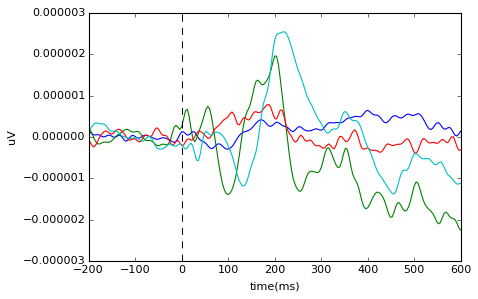

In [359]:
epoca_promedio_x_electrodo(p02, 8)
epoca_promedio_x_electrodo(s02, 8)
epoca_promedio_x_electrodo(s04, 8)
epoca_promedio_x_electrodo(p09, 8)


In [6]:
def epoca_promedio_electrodos(sujeto, electrodos = ELECTRODE):
    '''Esta funcion gráfica una promedio de todas las epocas por electrodo, todos los electrodos por defecto'''
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    for i in electrodos:        
        electrodo_matrix = sujeto_matrix[:, i, :]
        plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_matrix.mean(axis=0))
    plt.xlabel("time(ms)")
    plt.ylabel("uV")
    plt.axvline(x=0, linestyle='--', color='black', linewidth=0.5)
    plt.show()

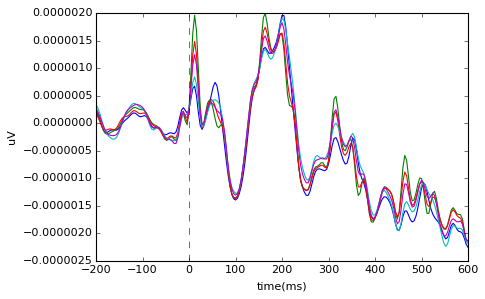

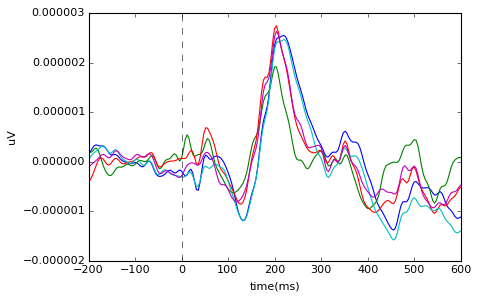

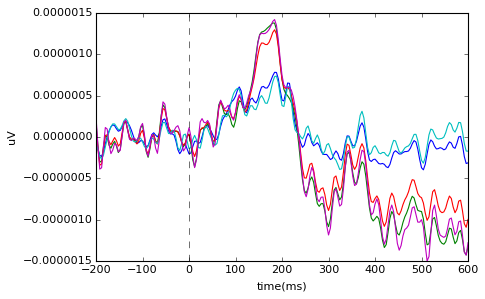

In [360]:
#epoca_promedio_por_electrodo_2(p01)
epoca_promedio_electrodos(s02)
epoca_promedio_electrodos(p09)
epoca_promedio_electrodos (s04)

In [165]:
# No haria mas falta esta funcion
"""
def plot_ej2(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion grafica el promedio entre epochs para cada muestra (1er muestra, primer medición 
    y % entre primeras epochs, la ultima muestra es la última medicion y % entre ultimas epochs )'''
    xs = electrodo_i_matrix.shape[1]
    plt.plot(range(0,xs), electrodo_i_matrix.mean(axis=0), linestyle=linestyle)
"""

In [7]:
def canal_promediado_por_epoca(sujeto, electrodos = ELECTRODE, linestyle='-', linewidth=1):
    '''Esta funcion gráfica el  promedio del voltaje de cada epoch en un electrodo, todos los electrodos por defecto'''
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    for i in electrodos:        
        electrodo_matrix = sujeto_matrix[:, i, :]
        xs = electrodo_matrix.shape[0]
        plt.plot(range(0,xs), electrodo_matrix.mean(axis=1),linestyle=linestyle, linewidth=linewidth)
        
    plt.xlabel("epoch")
    plt.ylabel("uV")
    plt.show()
     

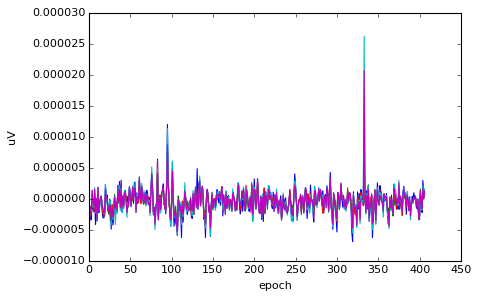

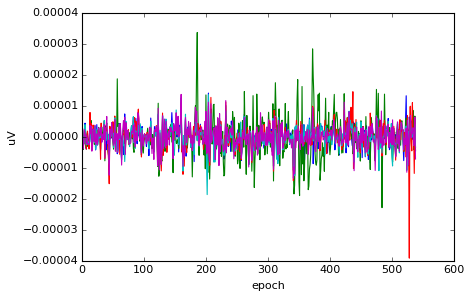

In [328]:
canal_promediado_por_epoca(s02)
canal_promediado_por_epoca(p09)

# Ejercicio 1

## Análisis de frecuencias

In [166]:
def potencia_por_epoca(sujeto, max_frec):
    electrodes = [8, 44, 80, 131, 185]
    cant_frec = 195
    f, Pxx = welch_electrode_mean(sujeto, electrodes)
    
    xs = []
    for j in range(0,len(f)):
        if(f[j]>max_frec):
            xs.append(j);
            break;
    max_index = xs[0]
    
    y_labels = ["{0:.2f}".format(f_i) for f_i in f]
    pxx_dataframe = pd.DataFrame(Pxx[:, :max_index], columns=y_labels[:max_index])
    grafico_heatmap(pxx_dataframe)

In [167]:
def grafico_heatmap(frecuencies):
    frecuencies = frecuencies.T
    #frecuencies = frecuencies
    ax=seaborn.heatmap(
        frecuencies,
        cmap= "coolwarm",
        xticklabels=100,
        yticklabels=20
    )
    plt.show()

In [168]:
def welch_electrode_mean(sujeto, electrodes):
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    m1 = sujeto_matrix[:, electrodes, :]
    mean_m1 = np.mean(m1, axis=1)
    f, Pxx = welch(mean_m1, float(Samples/Duration), nfft=1025)
    #f, Pxx = welch(mean_m1)#, float(Samples/Duration))#, nfft=Samples)
    return f, Pxx

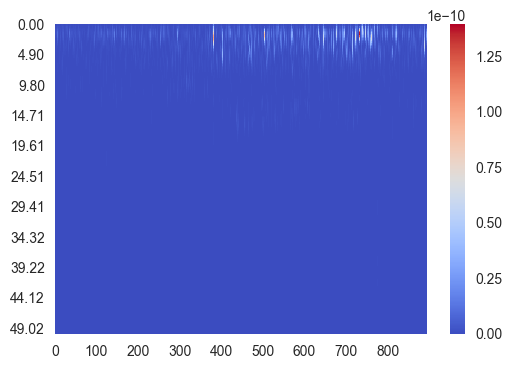

In [171]:
potencia_por_epoca(p01, 50)

## A2

In [361]:
def potencia_por_canal(sujeto):
    """Plotea el power density de cada frecuencia para todos los canales del registro"""
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    frecs = []
    for i in range(0,255):
        f, Pxx = powers_welch_by_epoch(sujeto_matrix, i)
        Pxx = Pxx
        frec = Pxx.mean(0)
        frecs.append(frec)
    #plt.figure(figsize=(20,12))
    for i in range(0,255):
        plt.plot(f,frecs[i])
    plt.xlim(0,40)
    plt.xlabel("frecuency [Hz]")
    plt.ylabel(" V**2/Hz")
    plt.show()

In [12]:
def powers_welch_by_epoch(sujeto_matrix, electrode):
    '''Para un electrodo, cada epoch(todas sus muetras) calculamos welch, 
    es decir todas las frecuencias y sus potencias'''
    #for i in range (0,894):
    elec_x_frec = sujeto_matrix[:, electrode, :]
    f, Pxx = welch(elec_x_frec, float(Samples/0.8), nfft=1025)
    return f,Pxx

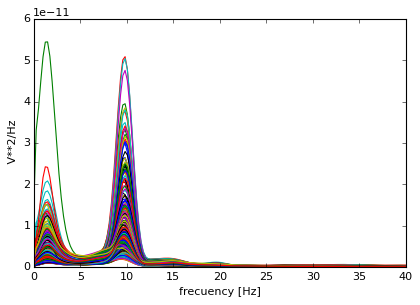

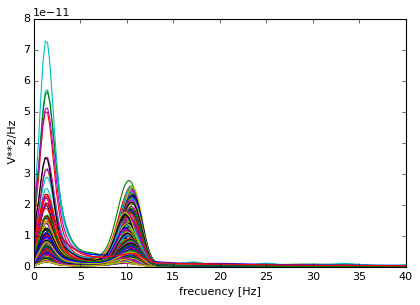

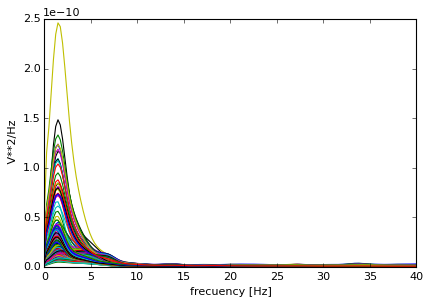

In [363]:
potencia_por_canal(s02)
potencia_por_canal(s04)
potencia_por_canal(p09)

## 2b

In [76]:
def bandas_frecuencia_sujeto(sujeto): 
    """
    Esta función se realizo para gráficar las bandas de frecuencia para un solo sujeto (con fines de economizar tiempo)
    En caso de de ser necesario puede agrandarse a varios sujetos,  ver 2.e 
    """
    
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    mean_epoch = np.mean(sujeto_matrix, axis=0) #promedio de todas las epocas
    f, Pxx = welch(mean_epoch, float(Samples/Duration), nfft=1025)
    electrodes_power_mean = np.mean(Pxx, axis=0) #promedio de la potencia x frecuencia de todas los electrodos
    
    
    xs = []
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1]]:
        for j in range(0,len(f)):
            if(f[j]>i):
                xs.append(j);
                break;
    Delta = np.mean(electrodes_power_mean[0:xs[0]])
    Theta = np.mean(electrodes_power_mean[xs[0]:xs[1]])
    Alpha = np.mean(electrodes_power_mean[xs[1]:xs[2]])
    Beta = np.mean(electrodes_power_mean[xs[2]:xs[3]])
    Gamma = np.mean(electrodes_power_mean[xs[3]:])
    
    
    res = [Delta, Theta, Alpha, Beta, Gamma]
    return res

In [77]:
def banda_frecuencia_groups():
    frecuencias_S = []
    frecuencias_P = []
    for sujeto_S in SUJETOS_S:
        frecuencias_S.append(bandas_frecuencia_sujeto(sujeto_S))
    for sujeto_P in SUJETOS_P:
        frecuencias_P.append(bandas_frecuencia_sujeto(sujeto_P))
    
    return frecuencias_S, frecuencias_P

In [209]:
def plot_bandas(res):    
    res = pd.DataFrame(res, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]) #Lo pase a Pandas para graficar más lindo 
    seaborn.violinplot(data= res, split= True, scale="width", orient= "v") 
    plt.ylabel("V**2/Hz")
    plt.xlabel("frecuency band")
    plt.show()

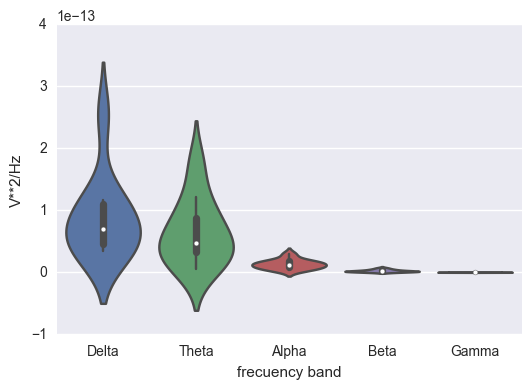

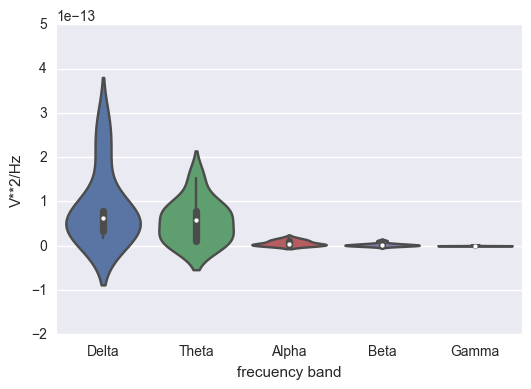

In [277]:
##bandas_frecuencia_main
res_main_S, res_main_P = banda_frecuencia_groups()
plot_bandas(res_main_S)
plot_bandas(res_main_P)

In [281]:
print np.mean(np.array(res_main_S)[:, 3]) 
print np.mean(np.array(res_main_P)[:, 3])

2.67816548339e-15
2.56160826643e-15


# 2c

In [93]:
res_main_S = np.array(res_main_S)
alphas_S = res_main_S[:, 2]

res_main_P = np.array(res_main_P)
alphas_P = res_main_P[:, 2]

alpha_dataframe = pd.DataFrame(np.array((alphas_S, alphas_P)), index=["S", "P"])

## Strip Plot

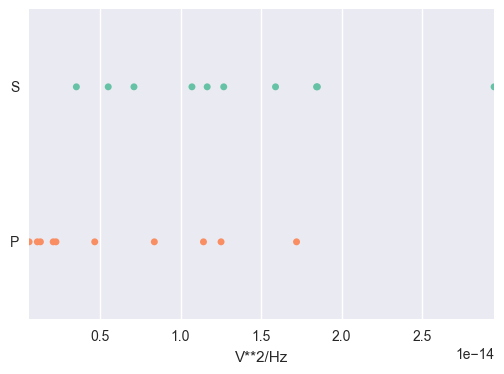

In [103]:
seaborn.stripplot(data= alpha_dataframe.T, palette="Set2", orient="h") #, orient= "h", scale= "width")
plt.xlabel("V**2/Hz")
xmin = min(alpha_dataframe.min())
xmax = max(alpha_dataframe.max())
plt.xlim(xmin, xmax)
plt.show()


## Swarm Plot

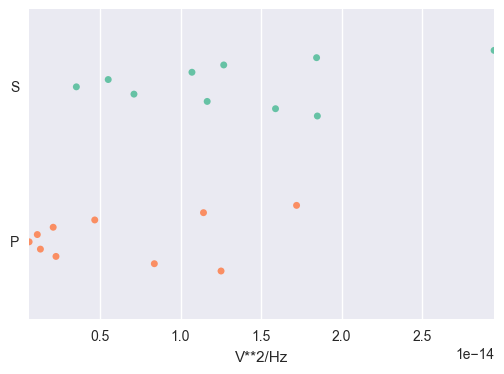

In [104]:
seaborn.swarmplot(data= alpha_dataframe.T, palette="Set2", orient= "h")#, orient= "h", scale= "width")
plt.xlabel("V**2/Hz")
xmin = min(alpha_dataframe.min())
xmax = max(alpha_dataframe.max())
plt.xlim(xmin, xmax)
plt.show()

## Boxplot

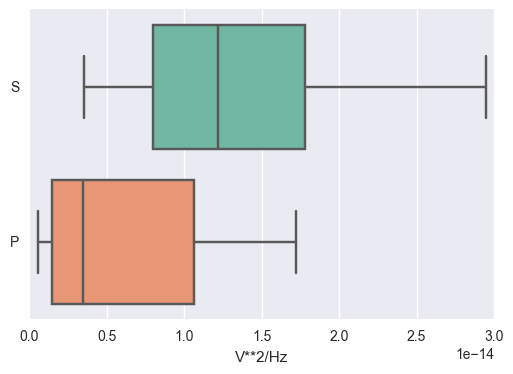

In [105]:
seaborn.boxplot(data= alpha_dataframe.T , orient= "h", palette="Set2" )#, scale= "width")
plt.xlabel("V**2/Hz")
plt.show()

## Violinplot

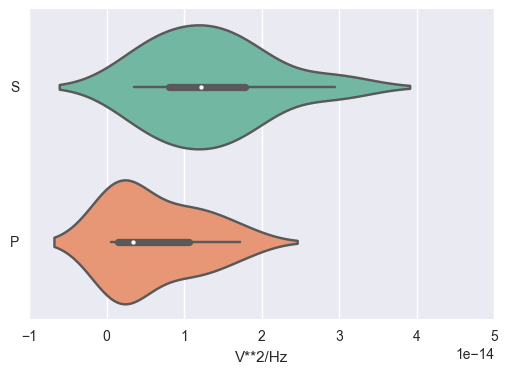

In [106]:
seaborn.violinplot(data= alpha_dataframe.T , orient= "h", scale= "width", palette="Set2")
plt.xlabel("V**2/Hz")
plt.show()

## Lvplot

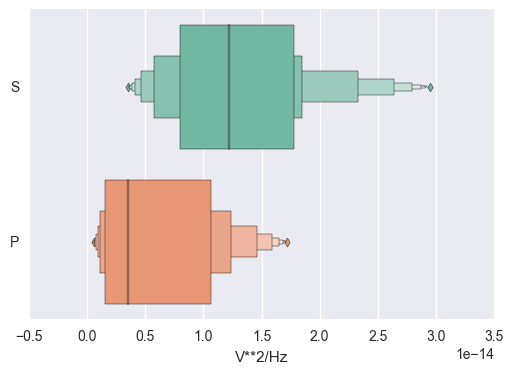

In [107]:
seaborn.lvplot(data = alpha_dataframe.T, orient= "h", palette="Set2")
plt.xlabel("V**2/Hz")

## Pointplot

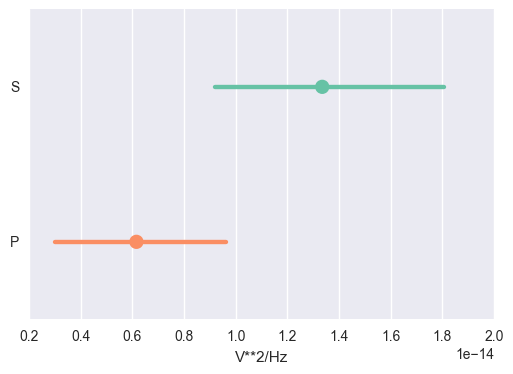

In [108]:
seaborn.pointplot(data = alpha_dataframe.T, orient= "h", join = False , palette="Set2")# , ci="sd")
plt.xlabel("V**2/Hz")

## Barplot

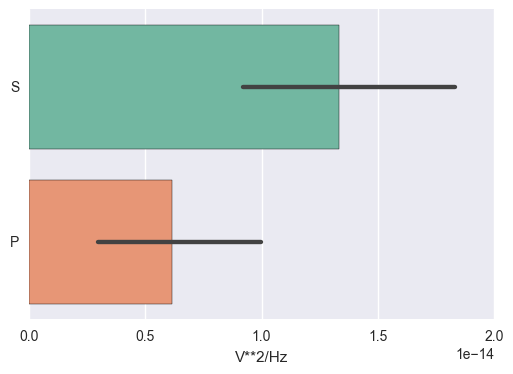

In [109]:
seaborn.barplot(data = alpha_dataframe.T, orient= "h" , palette="Set2")#, join = False)# , ci="sd")
plt.xlabel("V**2/Hz")

## Countplot

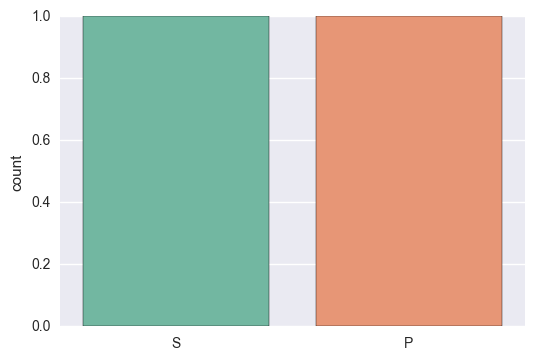

In [113]:
seaborn.countplot(x = alpha_dataframe.index, data = alpha_dataframe, orient= "v", palette="Set2") 
# No entiendo muy bien como esto podria servirnos, a menos que agreguemos mas sujetos, o condiciones

# Recomendación del gráfico
Ya que nos interesa ver la potencia en la frecuencia Alpha y comparar la distribución entre 2 grupos: S y P, un Violinplot nos permitira ver la distribucion de los valores de potencia de todos los sujetos en cada grupo en esta banda de frecuencia y no solo la mediana y extremos. Siendo más descriptiva y esto podría brindar una información mas detallada que solo las medidas de centralidad.

# 2d

In [172]:
def grafico_bandas_frec():
    global res_main_S, res_main_P
    for i in [0,1,2,3,4]:
        res_main_S = np.array(res_main_S)
        banda_frec_S = res_main_S[:, i]
        
        res_main_P = np.array(res_main_P)
        banda_frec_P = res_main_P[:, i]
        
        banda_dataframe = pd.DataFrame(np.array((banda_frec_S, banda_frec_P)), index=["S", "P"])
        
        seaborn.violinplot(data= banda_dataframe.T , orient= "h", scale= "width", palette="Set2")
        frecs = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
        plt.xlabel("V**2/Hz")
        plt.title(frecs[i])

        plt.show()

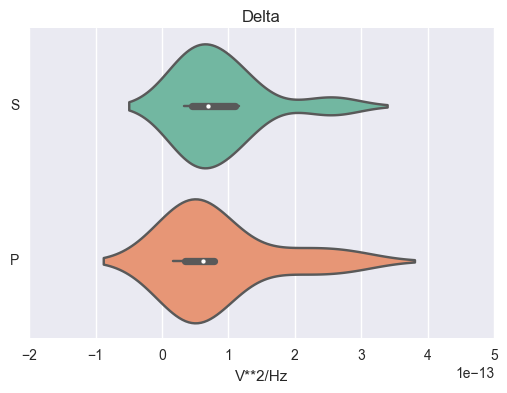

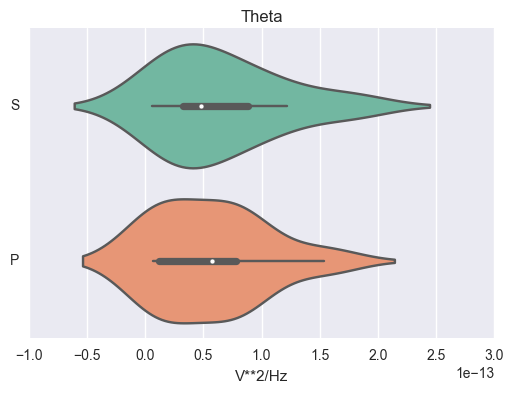

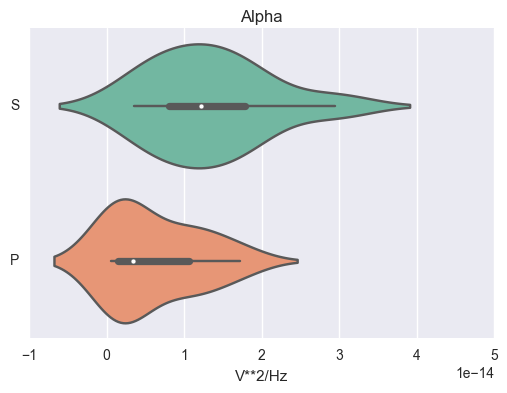

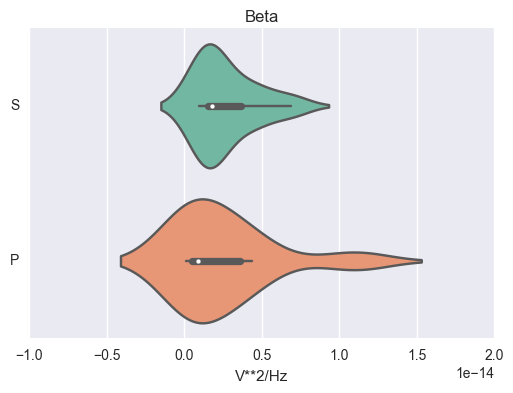

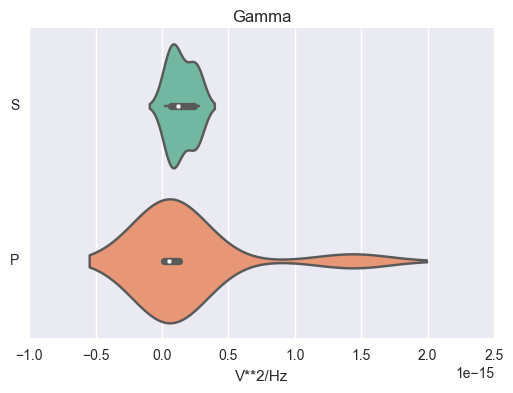

In [173]:
grafico_bandas_frec()

## Estadistica

In [152]:
res_main_S_dataframe = pd.DataFrame(res_main_S, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"])
res_main_P_dataframe = pd.DataFrame(res_main_P, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"])

Lo mejor seria realizar un anova de dos factores, Grupo (S,P) x Banda ("Delta", "Theta", "Alpha", "Beta", "Gamma")
Si no puedo hacer un Test de T para cada banda de frecuencia, pero deberia realizar un ajuste de comparaciones múltiples al p-value


In [ ]:
# Ver Normalidad o decir que no me importa nada y asumo normalidad

In [165]:
ttest_delta = sp.stats.ttest_ind(res_main_S_dataframe["Delta"],res_main_P_dataframe["Delta"])
ttest_theta = sp.stats.ttest_ind(res_main_S_dataframe["Theta"],res_main_P_dataframe["Theta"])
ttest_alpha = sp.stats.ttest_ind(res_main_S_dataframe["Alpha"],res_main_P_dataframe["Alpha"])
ttest_beta = sp.stats.ttest_ind(res_main_S_dataframe["Beta"],res_main_P_dataframe["Beta"])
ttest_gamma = sp.stats.ttest_ind(res_main_S_dataframe["Gamma"],res_main_P_dataframe["Gamma"])

# al tratarse de múltiples comparaciones debemos realizar un ajuste de comparaciones múltiples
# Alfa de cada comparación = alfa general / número de comparaciones.

alfa_comp = 0.05/5 # [p-value / cantidad de comparaciones]
# para más información consultar --> http://www.cienciasinseso.com/cuando-los-ceros-de-la-p-si-importan/
print alfa_comp

if ttest_delta[1] > alfa_comp:
    print("Banda Delta \tT-Test [T]: %s" %round(ttest_delta[0], 4) + " , p-value: %s" %(ttest_delta[1]))
if ttest_theta[1] > alfa_comp:
    print("Banda Theta \tT-Test [T]: %s" %round(ttest_theta[0], 4) + " , p-value: %s" %(ttest_theta[1]))
if ttest_alpha[1] > alfa_comp:
    print("Banda Alpha \tT-Test [T]: %s" %round(ttest_alpha[0], 4) + " , p-value: %s" %(ttest_alpha[1]))
if ttest_beta[1] > alfa_comp:
    print("Banda Beta \tT-Test [T]: %s" %round(ttest_beta[0], 4) + " , p-value: %s" %(ttest_beta[1]))
if ttest_gamma[1] > alfa_comp:
    print("Banda Gamma \tT-Test [T]: %s" %round(ttest_gamma[0], 4) + " , p-value: %s" %(ttest_gamma[1]))
       

0.01
Banda Delta 	T-Test [T]: 0.0297 , p-value: 0.97665149882
Banda Theta 	T-Test [T]: 0.4144 , p-value: 0.683482296961
Banda Alpha 	T-Test [T]: 2.3624 , p-value: 0.0296192553533
Banda Beta 	T-Test [T]: 0.0948 , p-value: 0.925544127547
Banda Gamma 	T-Test [T]: -0.3648 , p-value: 0.719523703319


# 2.e

Dado que los parametros de la pobalación para normalizar son desconocidos, se decidio emplear una normalización T de Student
https://es.wikipedia.org/wiki/Normalizaci%C3%B3n_(estad%C3%ADstica)_


In [275]:
def bandas_normalizadas_frecuencia_sujeto(sujeto): 
    """
    Esta función se realizo para gráficar las bandas de frecuencia para un solo sujeto (con fines de economizar tiempo)
    En caso de de ser necesario puede agrandarse a varios sujetos,  ver 2.e 
    """
    
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    mean_epoch = np.mean(sujeto_matrix, axis=0) #promedio de todas las epocas (como hace diego)
    f, Pxx = welch(mean_epoch, float(Samples/Duration), nfft=1025)

    indices_bandas = []
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1],GAMMA[1]]:
        for j in range(0,len(f)):
            if(f[j]>i):
                indices_bandas.append(j);
                break;

    for i in ELECTRODE:
        valores_de_normalizacion = [sum(Pxx[i][0:indices_bandas[0]])
                                    ,sum(Pxx[i][indices_bandas[0]:indices_bandas[1]])
                                    ,sum(Pxx[i][indices_bandas[1]:indices_bandas[2]])
                                    ,sum(Pxx[i][indices_bandas[2]:indices_bandas[3]])
                                    ,sum(Pxx[i][indices_bandas[3]:indices_bandas[4]])]
        
        Pxx[i][0:indices_bandas[0]] = Pxx[i][0:indices_bandas[0]] / valores_de_normalizacion[0]
        Pxx[i][indices_bandas[0]:indices_bandas[1]] = Pxx[i][indices_bandas[0]:indices_bandas[1]] / valores_de_normalizacion[1]
        Pxx[i][indices_bandas[1]:indices_bandas[2]] = Pxx[i][indices_bandas[1]:indices_bandas[2]] / valores_de_normalizacion[2]
        Pxx[i][indices_bandas[2]:indices_bandas[3]] = Pxx[i][indices_bandas[2]:indices_bandas[3]] / valores_de_normalizacion[3]
        Pxx[i][indices_bandas[3]:indices_bandas[4]] = Pxx[i][indices_bandas[3]:indices_bandas[4]] / valores_de_normalizacion[4]
    
    # Prueba para ver si la normalización es correcta
    #print "Despues"
    #print sum(Pxx[ELECTRODE[0]][0:indices_bandas[0]])
    #print Pxx[ELECTRODE].shape
    electrodes_power_mean = np.mean(Pxx[ELECTRODE], axis=0) #promedio de la potencia x frecuencia de todos los electrodos
    
    
    Delta = np.mean(electrodes_power_mean[0:indices_bandas[0]])
    Theta = np.mean(electrodes_power_mean[indices_bandas[0]:indices_bandas[1]])
    Alpha = np.mean(electrodes_power_mean[indices_bandas[1]:indices_bandas[2]])
    Beta = np.mean(electrodes_power_mean[indices_bandas[2]:indices_bandas[3]])
    Gamma = np.mean(electrodes_power_mean[indices_bandas[3]:indices_bandas[4]])
    
    
    res = [Delta, Theta, Alpha, Beta, Gamma]
    return res

In [255]:
def bandas_normalizadas_groups():
    frecuencias_S = []
    frecuencias_P = []
    for sujeto_S in SUJETOS_S:
        frecuencias_S.append(bandas_normalizadas_frecuencia_sujeto(sujeto_S))
    for sujeto_P in SUJETOS_P:
        frecuencias_P.append(bandas_normalizadas_frecuencia_sujeto(sujeto_P))
    
    return frecuencias_S, frecuencias_P

In [276]:
frec_normalizadas_S, frec_normalizadas_P = bandas_normalizadas_groups()

(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)
(256, 513)


In [271]:
S = pd.DataFrame(frec_normalizadas_S, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]) #Lo pase a Pandas para graficar más lindo 
S

,Delta,Theta,Alpha,Beta,Gamma
0,0.058824,0.0625,0.047619,0.014493,0.016393
1,0.058824,0.0625,0.047619,0.014493,0.016393
2,0.058824,0.0625,0.047619,0.014493,0.016393
3,0.058824,0.0625,0.047619,0.014493,0.016393
4,0.058824,0.0625,0.047619,0.014493,0.016393
5,0.058824,0.0625,0.047619,0.014493,0.016393
6,0.058824,0.0625,0.047619,0.014493,0.016393
7,0.058824,0.0625,0.047619,0.014493,0.016393
8,0.058824,0.0625,0.047619,0.014493,0.016393
9,0.058824,0.0625,0.047619,0.014493,0.016393


True

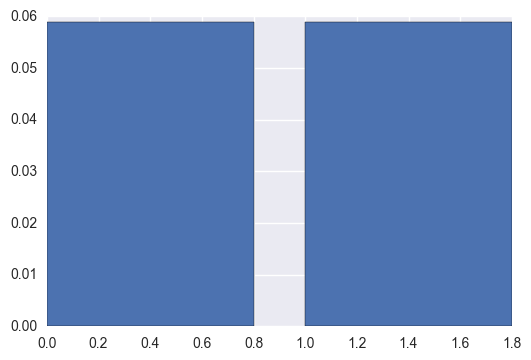

In [265]:
alpha_p = np.mean(np.array(frec_normalizadas_P)[:, 0])
alpha_s = np.mean(np.array(frec_normalizadas_S)[:, 0])
plt.bar(range(2), [alpha_p, alpha_s])
alpha_p == alpha_s

In [266]:
alpha_p - alpha_s

0.0

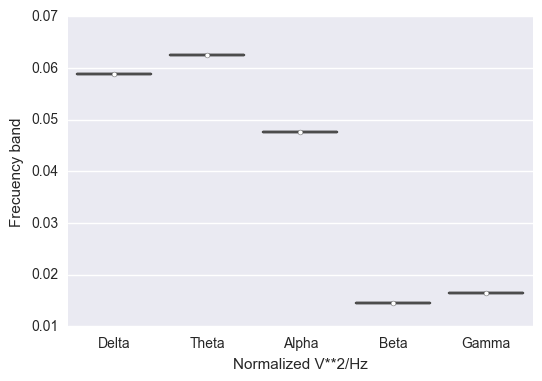

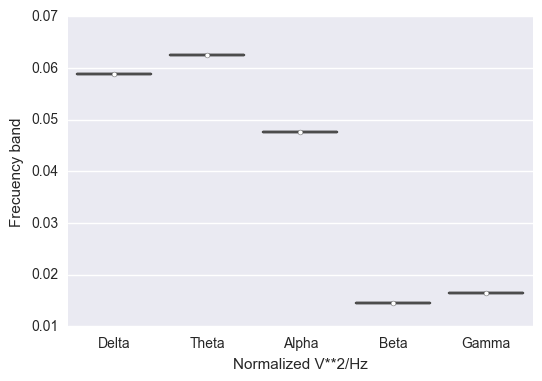

In [263]:
def plot_bandas_normalizadas(res):    
    res = pd.DataFrame(res, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]) #Lo pase a Pandas para graficar más lindo 
    seaborn.violinplot(data= res, split= True, orient= "v", scale="width")
    plt.xlabel("Normalized V**2/Hz")
    plt.ylabel("Frecuency band")
    #plt.ylim(0.00115,0.0011501)
    plt.show()

plot_bandas_normalizadas(frec_normalizadas_S)
plot_bandas_normalizadas(frec_normalizadas_P)

In [282]:
def grafico_bandas_frec():
    global frec_normalizadas_S, frec_normalizadas_P
    res_main_S = frec_normalizadas_S
    res_main_P = frec_normalizadas_P
    for i in [0,1,2,3,4]:
        res_main_S = np.array(res_main_S)
        banda_frec_S = res_main_S[:, i]
        
        res_main_P = np.array(res_main_P)
        banda_frec_P = res_main_P[:, i]
        
        banda_dataframe = pd.DataFrame(np.array((banda_frec_S, banda_frec_P)), index=["S", "P"])
        
        seaborn.violinplot(data= banda_dataframe.T , orient= "h", scale= "width", palette="Set2")
        frecs = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
        plt.xlabel("V**2/Hz")
        plt.title(frecs[i])

        plt.show()

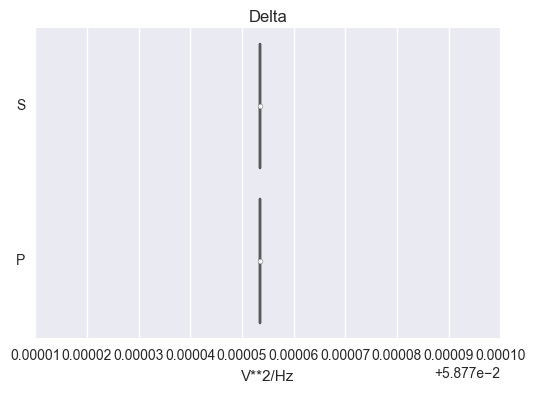

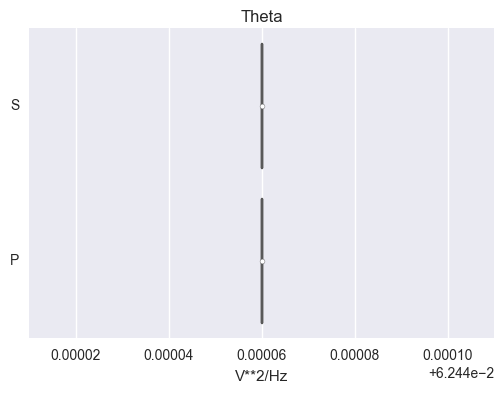

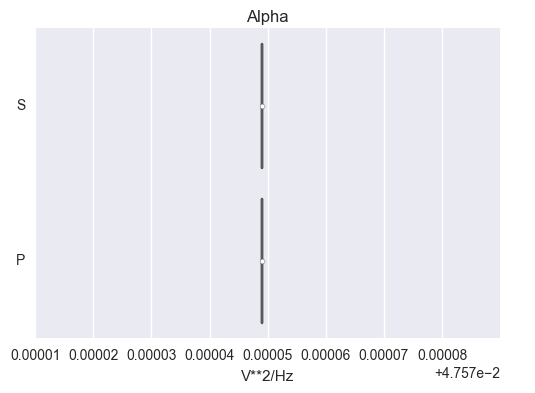

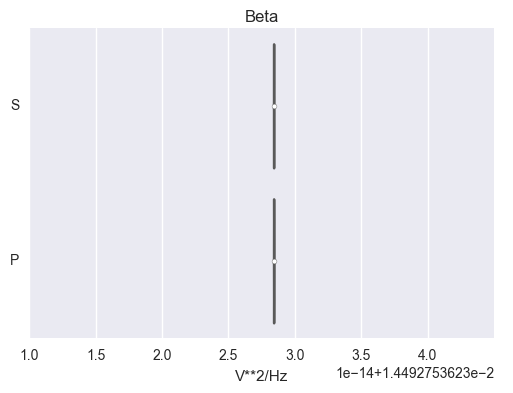

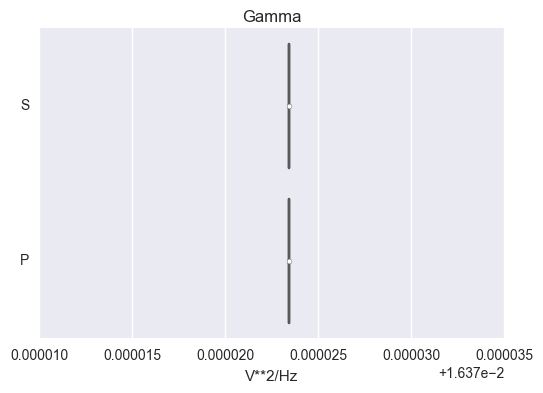

In [283]:
grafico_bandas_frec()

In [14]:
Delta

,0.0,0.24512195122,0.490243902439,0.735365853659,0.980487804878,1.2256097561,1.47073170732,1.71585365854,1.96097560976,2.20609756098,2.4512195122,2.69634146341,2.94146341463,3.18658536585,3.43170731707,3.67682926829,3.92195121951
Sujetos Sanos (S),1.624551e-19,8.392699e-19,2.243675e-18,4.168128e-18,6.130730e-18,7.683483e-18,8.530930e-18,8.584756e-18,7.947089e-18,6.842710e-18,5.534055e-18,4.250020e-18,3.145630e-18,2.293775e-18,1.699554e-18,1.324643e-18,1.111619e-18
Sujetos Patologicos (P),1.110141e-19,1.067045e-18,3.146229e-18,5.358337e-18,6.590775e-18,6.334489e-18,4.920811e-18,3.270202e-18,2.340390e-18,2.616855e-18,3.920899e-18,5.589752e-18,6.866395e-18,7.253888e-18,6.664383e-18,5.348664e-18,3.716843e-18


In [13]:
todas, Delta, Theta, Alpha, Beta, Gamma =  bandas_frecuencia_normalizadas ([s01],[p01])

In [284]:
seaborn.violinplot(data= Delta.T,  orient= "h", scale="width", palette="muted", split= True)
plt.xlabel("V**2/Hz")
plt.show()

seaborn.violinplot(data= Theta.T , orient= "h", scale="count", palette="muted")
plt.xlabel("V**2/Hz")
plt.show()

seaborn.violinplot(data= Alpha.T , orient= "h", scale= "width", palette="muted")
plt.xlabel("V**2/Hz")
plt.show()

seaborn.violinplot(data=Beta.T , orient= "h", scale= "width", palette="muted")
plt.xlabel("V**2/Hz")
plt.show()

seaborn.violinplot(data= Gamma.T , orient= "h", scale= "width", palette="muted")
plt.xlabel("V**2/Hz")
plt.show()

NameError: name 'Delta' is not defined

In [527]:
ttest_delta_norm = sp.stats.ttest_ind(Delta.iloc[0],Delta.iloc[1])
ttest_theta_norm = sp.stats.ttest_ind(Theta.iloc[0],Theta.iloc[1])
ttest_alpha_norm = sp.stats.ttest_ind(Alpha.iloc[0],Alpha.iloc[1])
ttest_beta_norm = sp.stats.ttest_ind(Beta.iloc[0],Beta.iloc[1])
ttest_gamma_norm = sp.stats.ttest_ind(Gamma.iloc[0],Gamma.iloc[1])

# al tratarse de múltiples comparaciones debemos realizar un ajuste de comparaciones múltiples
# Alfa de cada comparación = alfa general / número de comparaciones.
alfa_comp = 0.05/5
# para más información consultar --> http://www.cienciasinseso.com/cuando-los-ceros-de-la-p-si-importan/

if ttest_delta_norm[1] < alfa_comp:
    print("Banda Delta \tT-Test [T]: %s" %round(ttest_delta_norm[0], 4) + " , p-value: %s" %(ttest_delta_norm[1]))
if ttest_theta_norm[1] < alfa_comp:
    print("Banda Theta \tT-Test [T]: %s" %round(ttest_alpha_norm[0], 4) + " , p-value: %s" %(ttest_alpha_norm[1]))
if ttest_alpha_norm[1] < alfa_comp:
    print("Banda Alpha \tT-Test [T]: %s" %round(ttest_delta_norm[0], 4) + " , p-value: %s" %(ttest_delta_norm[1]))
if ttest_beta_norm[1] < alfa_comp:
    print("Banda Beta \tT-Test [T]: %s" %round(ttest_beta_norm[0], 4) + "  , p-value: %s" %(ttest_beta_norm[1]))
if ttest_gamma_norm[1] < alfa_comp:
    print("Banda Gamma \tT-Test [T]: %s" %round(ttest_gamma_norm[0], 4) + " , p-value: %s" %(ttest_gamma_norm[1]))
    
    
    

Banda Delta 	T-Test [T]: -6.0629 , p-value: 9.04785370921e-07
Banda Theta 	T-Test [T]: -4.9597 , p-value: 1.34614288122e-05
Banda Alpha 	T-Test [T]: -6.0629 , p-value: 9.04785370921e-07
Banda Beta 	T-Test [T]: -6.276  , p-value: 4.33655582219e-09
Banda Gamma 	T-Test [T]: -5.5242 , p-value: 1.95321180359e-07


# 2.2

## a)

In [14]:
def calculate_bin_max_min(matrix_sujeto):
    cant_electrodos = matrix_sujeto.shape[1]
    x25 = np.zeros(cant_electrodos)
    x75 = np.zeros(cant_electrodos)
    maximum = np.zeros(cant_electrodos)
    minimum = np.zeros(cant_electrodos)
    
    for i in range(0,cant_electrodos):
        electrodo_actual = np.copy(matrix_sujeto[:, i, :])
        np.sort(electrodo_actual, axis=None)

        maximum[i] = electrodo_actual.max()
        minimum[i] = electrodo_actual.min()
        x75[i] = np.percentile(electrodo_actual, 75)
        x25[i] = np.percentile(electrodo_actual, 25)
        
    return np.mean(maximum), np.mean(minimum), np.mean(x75), np.mean(x25)

In [15]:
def calculate_tbin(maximum, minimum, x75, x25, matrix_shape):
    n_instances = matrix_shape[0] * matrix_shape[2]
    return 2 * (x75-x25) / (math.pow(n_instances,1.0/3))

In [16]:
# numpy arange step
def calculate_probabilities(electrodo_matrix, max_val, min_val, t_bin):
    bins = np.arange(min_val, max_val, t_bin)
    acum = np.zeros(bins.shape[0] - 1)
    for i in range(0, electrodo_matrix.shape[0]):
        hist, _ = np.histogram(electrodo_matrix[i,:], bins=bins)
        acum = acum + hist
    return (acum / float(electrodo_matrix.shape[0] * electrodo_matrix.shape[1]))

In [29]:
def calculate_entropia(proba_x, cant_epochs, cant_muestras):
    res=0
    for i in range(0,len(proba_x)):
        if proba_x[i] > 0:
            res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras)),10)
    return -res

In [22]:
def entropias_electrodos_por_sujeto(filename):
    p01 = sio.loadmat(filename)
    matrix_p01 = p01['data']
    cant_epochs = matrix_p01.shape[0]
    cant_electrodos = matrix_p01.shape[1]
    cant_muestras = matrix_p01.shape[2] 
    
    max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
    t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
    
    entropia_por_electrodo = []
    for i in range(cant_electrodos):
        electrodo_i_matrix = matrix_p01[:, i, :]
        #t_bin = calculate_tbin(maximum_values[i], minimum_values[i], x75_values[i], x25_values[i])
        probabilities = calculate_probabilities(electrodo_i_matrix, max_value, min_value, t_bin)
        entropia_por_electrodo.append(calculate_entropia(probabilities, cant_epochs, cant_muestras))
    return entropia_por_electrodo

In [30]:
filename_P = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [31]:
res_P = entropias_electrodos_por_sujeto(filename_P)

In [32]:
np.var(res_P)

2.864537743319147e-13

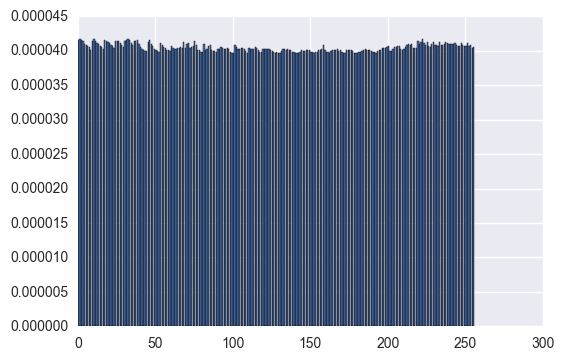

In [33]:
plt.bar(range(len(res_P[:256])), res_P[:256])
plt.show()

In [26]:
filename = "/Users/lmatayoshi/Desktop/EEG/S01.mat"

In [27]:
res = entropias_electrodos_por_sujeto(filename)

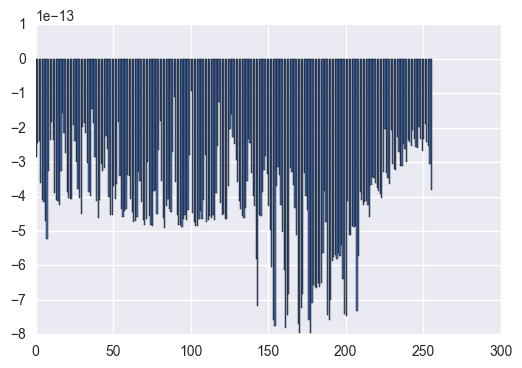

In [28]:
plt.bar(range(len(res[:256])), res[:256])
plt.show()